In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="ticks", palette="pastel")

# Loading of dataset

In [9]:
path_drive = "/content/drive/MyDrive/Colab Notebooks/Stock-Price-Prediction/data/stock_data.csv"
path_default = "./data/stock_data.csv"
stock_data = pd.read_csv(path_drive)
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format="%Y-%m-%d")
stock_data

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL
...,...,...,...,...,...,...,...,...
19581,2017-11-06,178.56000,180.45000,178.31000,180.17000,13275578,0,FB
19582,2017-11-07,180.50000,180.74800,179.40300,180.25000,12903836,0,FB
19583,2017-11-08,179.79000,180.35000,179.11000,179.56000,10467606,0,FB
19584,2017-11-09,178.31000,179.40000,177.09000,179.30000,12602188,0,FB


In [10]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19586 entries, 0 to 19585
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     19586 non-null  datetime64[ns]
 1   Open     19586 non-null  float64       
 2   High     19586 non-null  float64       
 3   Low      19586 non-null  float64       
 4   Close    19586 non-null  float64       
 5   Volume   19586 non-null  int64         
 6   OpenInt  19586 non-null  int64         
 7   Stock    19586 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.2+ MB


In [11]:
stock_data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,19586.000000,19586.000000,19586.000000,19586.000000,1.958600e+04,19586.0
mean,37.408582,37.881571,36.906405,37.406667,8.100395e+07,0.0
std,59.492049,60.287797,58.622548,59.480058,7.982366e+07,0.0
min,0.067200,0.067200,0.067200,0.067200,0.000000e+00,0.0
25%,1.412300,1.440600,1.384100,1.412300,3.385552e+07,0.0
50%,19.649500,19.933000,19.363000,19.640000,6.294731e+07,0.0
75%,38.605000,39.075750,38.229250,38.655500,1.010604e+08,0.0
max,386.690000,389.610000,379.345000,385.000000,2.069770e+09,0.0


In [12]:
companies = stock_data['Stock'].unique()
print(companies)

['AAPL' 'TSLA' 'MSFT' 'FB']


In [13]:
stocks ={}
for i in companies:
  stocks[i] = stock_data[stock_data['Stock'] == i].drop(columns=["OpenInt", "Stock"])
  print(stocks[i])

           Date       Open       High        Low      Close    Volume
0    1984-09-07    0.42388    0.42902    0.41874    0.42388  23220030
1    1984-09-10    0.42388    0.42516    0.41366    0.42134  18022532
2    1984-09-11    0.42516    0.43668    0.42516    0.42902  42498199
3    1984-09-12    0.42902    0.43157    0.41618    0.41618  37125801
4    1984-09-13    0.43927    0.44052    0.43927    0.43927  57822062
...         ...        ...        ...        ...        ...       ...
8359 2017-11-06  171.75000  174.36000  171.10000  173.63000  34901241
8360 2017-11-07  173.29000  174.51000  173.29000  174.18000  24424877
8361 2017-11-08  174.03000  175.61000  173.71000  175.61000  24451166
8362 2017-11-09  174.48000  175.46000  172.52000  175.25000  29533086
8363 2017-11-10  175.11000  175.38000  174.27000  174.67000  25130494

[8364 rows x 6 columns]
            Date    Open    High     Low   Close    Volume
8364  2010-06-28   17.00   17.00   17.00   17.00         0
8365  2010-06-29 

## Visualize close price history

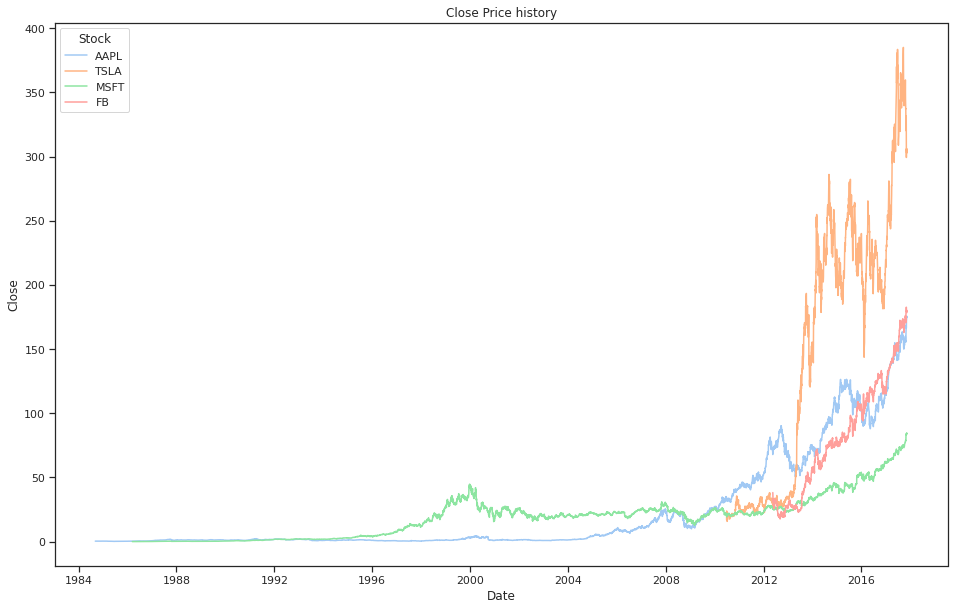

In [14]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Date",y="Close",data=stock_data, hue="Stock")
plt.title("Close Price history")
plt.show()

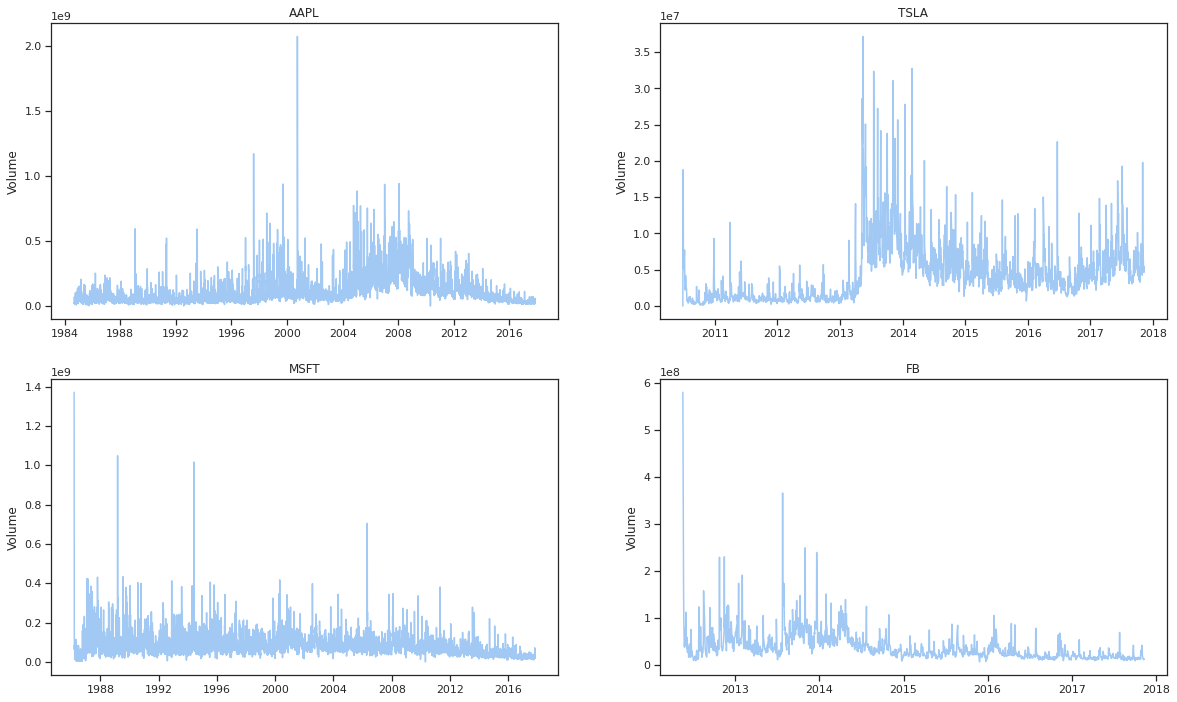

In [15]:
plt.figure(figsize=(20, 12))
for index, key in enumerate(companies):
  plt.subplot(2, 2, index + 1)
  plt.plot(stocks[key]["Date"], stocks[key]["Volume"])
  plt.title(key)
  plt.ylabel('Volume')

# Calculation of Technical Indicators